In [83]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

## Load and Visualize the Sales Data

In [84]:
# Read the sales data
file_path = "https://static.bc-edx.com/mbc/ai/m3/datasets/sales.csv"
df_sales = pd.read_csv(file_path)

# Display sample data
df_sales.head()

,ads,sales
0,21,8350
1,180,22820
2,50,12950
3,195,21105
4,96,15008


<Axes: title={'center': 'Sales per Number of Ads'}, xlabel='ads', ylabel='sales'>

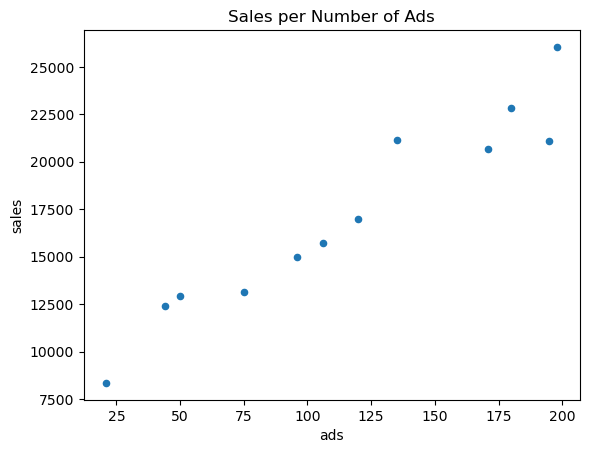

In [85]:
# Create a scatter plot with the sales information
sales_plot = df_sales.plot.scatter(
    x="ads",
    y="sales",
    title="Sales per Number of Ads"
)
sales_plot

## Prepare the Data to Fit the Linear Regression Model

In [86]:
# Create the X set by using the `reshape` function to format the ads data as a single column array.
X = df_sales['ads'].values.reshape(-1, 1)

# Display sample data
X

array([[ 21],
       [180],
       [ 50],
       [195],
       [ 96],
       [ 44],
       [171],
       [135],
       [120],
       [ 75],
       [106],
       [198]])

In [87]:
# Create an array for the dependent variable y with the sales data
y = df_sales['sales'].values

y

array([ 8350, 22820, 12950, 21105, 15008, 12390, 20695, 21121, 17000,
       13150, 15695, 26050])

In [88]:
y.shape

(12,)

## Build the Linear Regression Model

In [89]:
# Create a model with scikit-learn
model = LinearRegression()

In [90]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [91]:
# Display the slope
model.coef_

array([81.34898394])

In [92]:
# Display the y-intercept
model.intercept_

7764.796945240409

In [93]:
# Display the model's best fit line formula
print(f"y = {model.intercept_} + {model.coef_}")

y = 7764.796945240409 + [81.34898394]


## Plot the Best Fit Line for the Sales Prediction Model

In [94]:
# Make predictions using the X set
prediction_y = model.predict(X)

prediction_y

array([ 9473.12560793, 22407.614054  , 11832.24614212, 23627.84881306,
       15574.29940324, 11344.15223849, 21675.47319856, 18746.90977681,
       17526.67501774, 13865.97074056, 16387.78924262, 23871.89576487])

In [95]:
# Create a copy of the original data
df_sales_predictions = df_sales.copy()

# Add a column with the predicted sales values
df_sales_predictions["sales_predicted"] = prediction_y

# Display sample data
df_sales_predictions.head()

,ads,sales,sales_predicted
0,21,8350,9473.125608
1,180,22820,22407.614054
2,50,12950,11832.246142
3,195,21105,23627.848813
4,96,15008,15574.299403


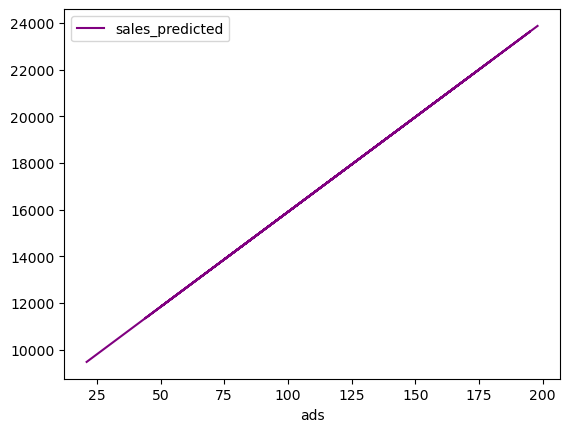

In [96]:
# Create a line plot of the predicted salary values
sales_plot = df_sales_predictions.plot.line(
    x='ads',
    y='sales_predicted',
    color='purple'
)

<Axes: xlabel='ads', ylabel='sales'>

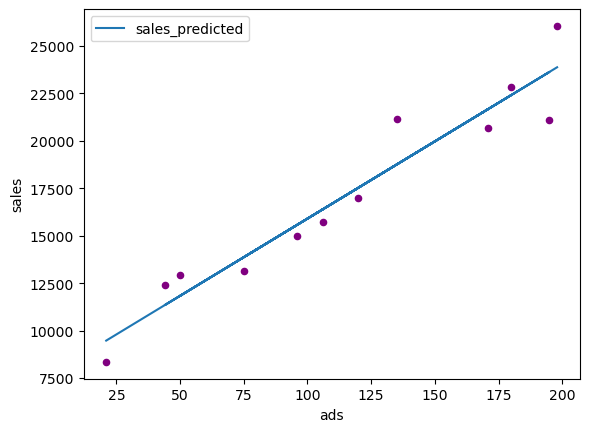

In [97]:
# Superpose the original data and the best fit line
# Create a scatter plot with the sales information
sales_plot = df_sales_predictions.plot.scatter(
    x='ads',
    y='sales',
    color='purple'
)

best_fit_line = df_sales_predictions.plot.line(
    x='ads',
    y='sales_predicted',
    ax=sales_plot
)
best_fit_line

## Make Manual Predictions

In [107]:
# Display the formula to predict the sales with 100 ads
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]} * 100")

# Predict the sales with 100 ads
y_hat = model.intercept_ + (model.coef_[0] * 100)

# Display the prediction
y_hat

Model's formula: y = 7764.796945240409 + 81.34898393753781 * 100


15899.69533899419

## Make Predictions Using the `predict` Function

In [99]:
# Create an array to predict sales for 100, 150, 200, 250, and 300 ads
X_ads = np.array([100, 150, 200, 250, 300])

# Format the array as a one-column array
X_ads = X_ads.reshape(-1, 1)

# Display sample data
X_ads

array([[100],
       [150],
       [200],
       [250],
       [300]])

In [100]:
# Predict sales for 100, 150, 200, 250, and 300 ads
predicted_sales = model.predict(X_ads)

In [101]:
predicted_sales

array([15899.69533899, 19967.14453587, 24034.59373275, 28102.04292962,
       32169.4921265 ])

In [102]:
predicted_sales

array([15899.69533899, 19967.14453587, 24034.59373275, 28102.04292962,
       32169.4921265 ])

In [103]:
X_ads.reshape(-1,1)

array([[100],
       [150],
       [200],
       [250],
       [300]])

In [104]:
# Create a DataFrame for the predicted sales
df_predicted_sales = pd.DataFrame(
    {
        "ads": X_ads.reshape(1, -1)[0],
        "predicted_sales": predicted_sales
    }
)

# Display data
df_predicted_sales

,ads,predicted_sales
0,100,15899.695339
1,150,19967.144536
2,200,24034.593733
3,250,28102.042930
4,300,32169.492127


## Linear Regression Model Assessment

In [105]:
# Import relevant metrics - score, r2, mse, rmse - from Scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

In [110]:
# Compute the metrics for the linear regression model
score = round(model.score(X, y, sample_weight=None),5)
r2 = round(r2_score(y, prediction_y),5)
#mse = round(mean_squared_error(y, predicted_sales),4)
#rmse = round(np.sqrt(mse),4)


# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
#print(f"The mean squared error is {mse}.")
#print(f"The root mean squared error is {rmse}.")

The score is 0.922.
The r2 is 0.922.


In [108]:
y.shape

(12,)

In [109]:
predicted_sales.shape

(5,)